# 3. Bycycle

In this tutorial, `ndspflow` will be used to run the bycycle analysis node with simulated data.

### Simulate Data

First, a group of 10 timeseries will be simulated and saved as a .npy file.

In [1]:
import os
import webbrowser

import numpy as np
import pandas as pd

from neurodsp.sim import sim_combined
from bycycle.plts import plot_burst_detect_summary

In [2]:
# Simulate data
n_timeseries = 5
fs = 500
n_seconds = 10

sigs = np.zeros((n_timeseries, int(fs * n_seconds)))
components = {'sim_bursty_oscillation': {'freq': 20}, 'sim_powerlaw': {'exponent': -2}}

for idx in range(n_timeseries):
    sigs[idx] = sim_combined(n_seconds, fs, components)

In [3]:
# Save data
for dirname in ['data', 'results']:
    if not os.path.isdir(dirname):
        os.mkdir(dirname)

np.save("data/sigs.npy", sigs)

### Running Bycycle

Next, the bycycle node will be ran using the simulated data. The parameters specified include:

- `sig` : name of the 2D timeseries .npy file
- `fs` : sampling rate in hz
- `f_range_bycycle` : the frequency rate for oscillations of interest
- `center_extrema` : defines the centers of cycles {peak, trough}
- `burst_method` : the burst detection method {cycles, peaks}
- `*_threshold` : burst detection thresholds
- `min_n_cycles` : minimum number of consecutive cycles for burst detection
- `axis` : the axis to compute features across
- `n_jobs` : the number of jobs to run in parallel (-1 defaults to max).
- `run_nodes` : which node(s) to run

In [4]:
%%bash

ndspflow \
-sig sigs.npy \
-fs 500 \
-f_range_bycycle 15 25 \
-center_extrema peak \
-burst_method cycles \
-amp_fraction_threshold .5 \
-amp_consistency_threshold 0 \
-period_consistency_threshold .5 \
-monotonicity_threshold .8 \
-min_n_cycles 2 \
-axis 0 \
-n_jobs -1 \
-run_nodes bycycle \
data results

210105-12:44:52,390 nipype.workflow INFO:
	 Workflow wf_ndspflow settings: ['check', 'execution', 'logging', 'monitoring']
210105-12:44:52,391 nipype.workflow INFO:
	 Running serially.
210105-12:44:52,392 nipype.workflow INFO:
	 [Node] Setting-up "wf_ndspflow.bycycle_node" in "/tmp/tmp5lj3vzrn/wf_ndspflow/bycycle_node".
210105-12:44:52,393 nipype.workflow INFO:
	 [Node] Running "bycycle_node" ("ndspflow.core.interfaces.BycycleNode")
210105-12:44:52,751 nipype.workflow INFO:
	 [Node] Finished "wf_ndspflow.bycycle_node".
210105-12:44:52,751 nipype.workflow INFO:
	 [Node] Setting-up "wf_ndspflow.report_node" in "/tmp/tmpzpwpkfcj/wf_ndspflow/report_node".
210105-12:44:53,152 nipype.workflow INFO:
	 [Node] Running "report_node" ("ndspflow.core.interfaces.ReportNode")
210105-12:44:54,930 nipype.workflow INFO:
	 [Node] Finished "wf_ndspflow.report_node".


### Results

Group reports may be used compare burst detection results between all signal arrays. Individual reports may be used to identify burst detection thresholds that are too conservative or too lenient. The plots in these reports are interactive and support rescaling the time axis. Cycles in the plots may be selected to relabel as burst or non-burst. Selecting the "Update Burst" button will save out manually burst detection adjustments as a csv file. However, it is recommended to adjust burst thresholds first.

In [5]:
# Open the group report in a new tab
webbrowser.open("results/bycycle/report_group.html")

True

In [6]:
# Open the a single report in a new tab
webbrowser.open("results/bycycle/signal_dim1-0000/report.html")

True

### Loading results

The bycycle node saves individual results as csv files. These json files may be loaded into dataframe objects.

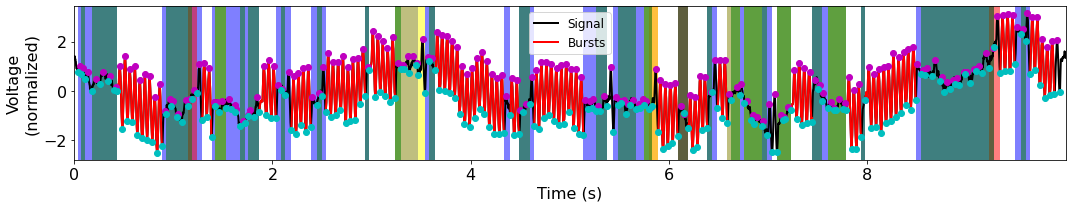

In [7]:
df = pd.read_csv('results/bycycle/signal_dim1-0000/results.csv')

thresholds = dict(amp_fraction_threshold=.5, amp_consistency_threshold=0,
                  period_consistency_threshold=.5, monotonicity_threshold=.8)

plot_burst_detect_summary(df, sigs[0], fs, thresholds, plot_only_result=True)